Write Up Example: https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# IMPORT DEPENDENCIES FOR THE PROJECT
import csv,time,pickle,glob,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import random

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-sign-data/train.p'
validation_file= 'traffic-sign-data/valid.p'
testing_file = 'traffic-sign-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train)) # set() method removes all the duplicates so that we can count the unique label instances

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
X_train.shape

(34799, 32, 32, 3)

In [4]:
y_train.shape

(34799,)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

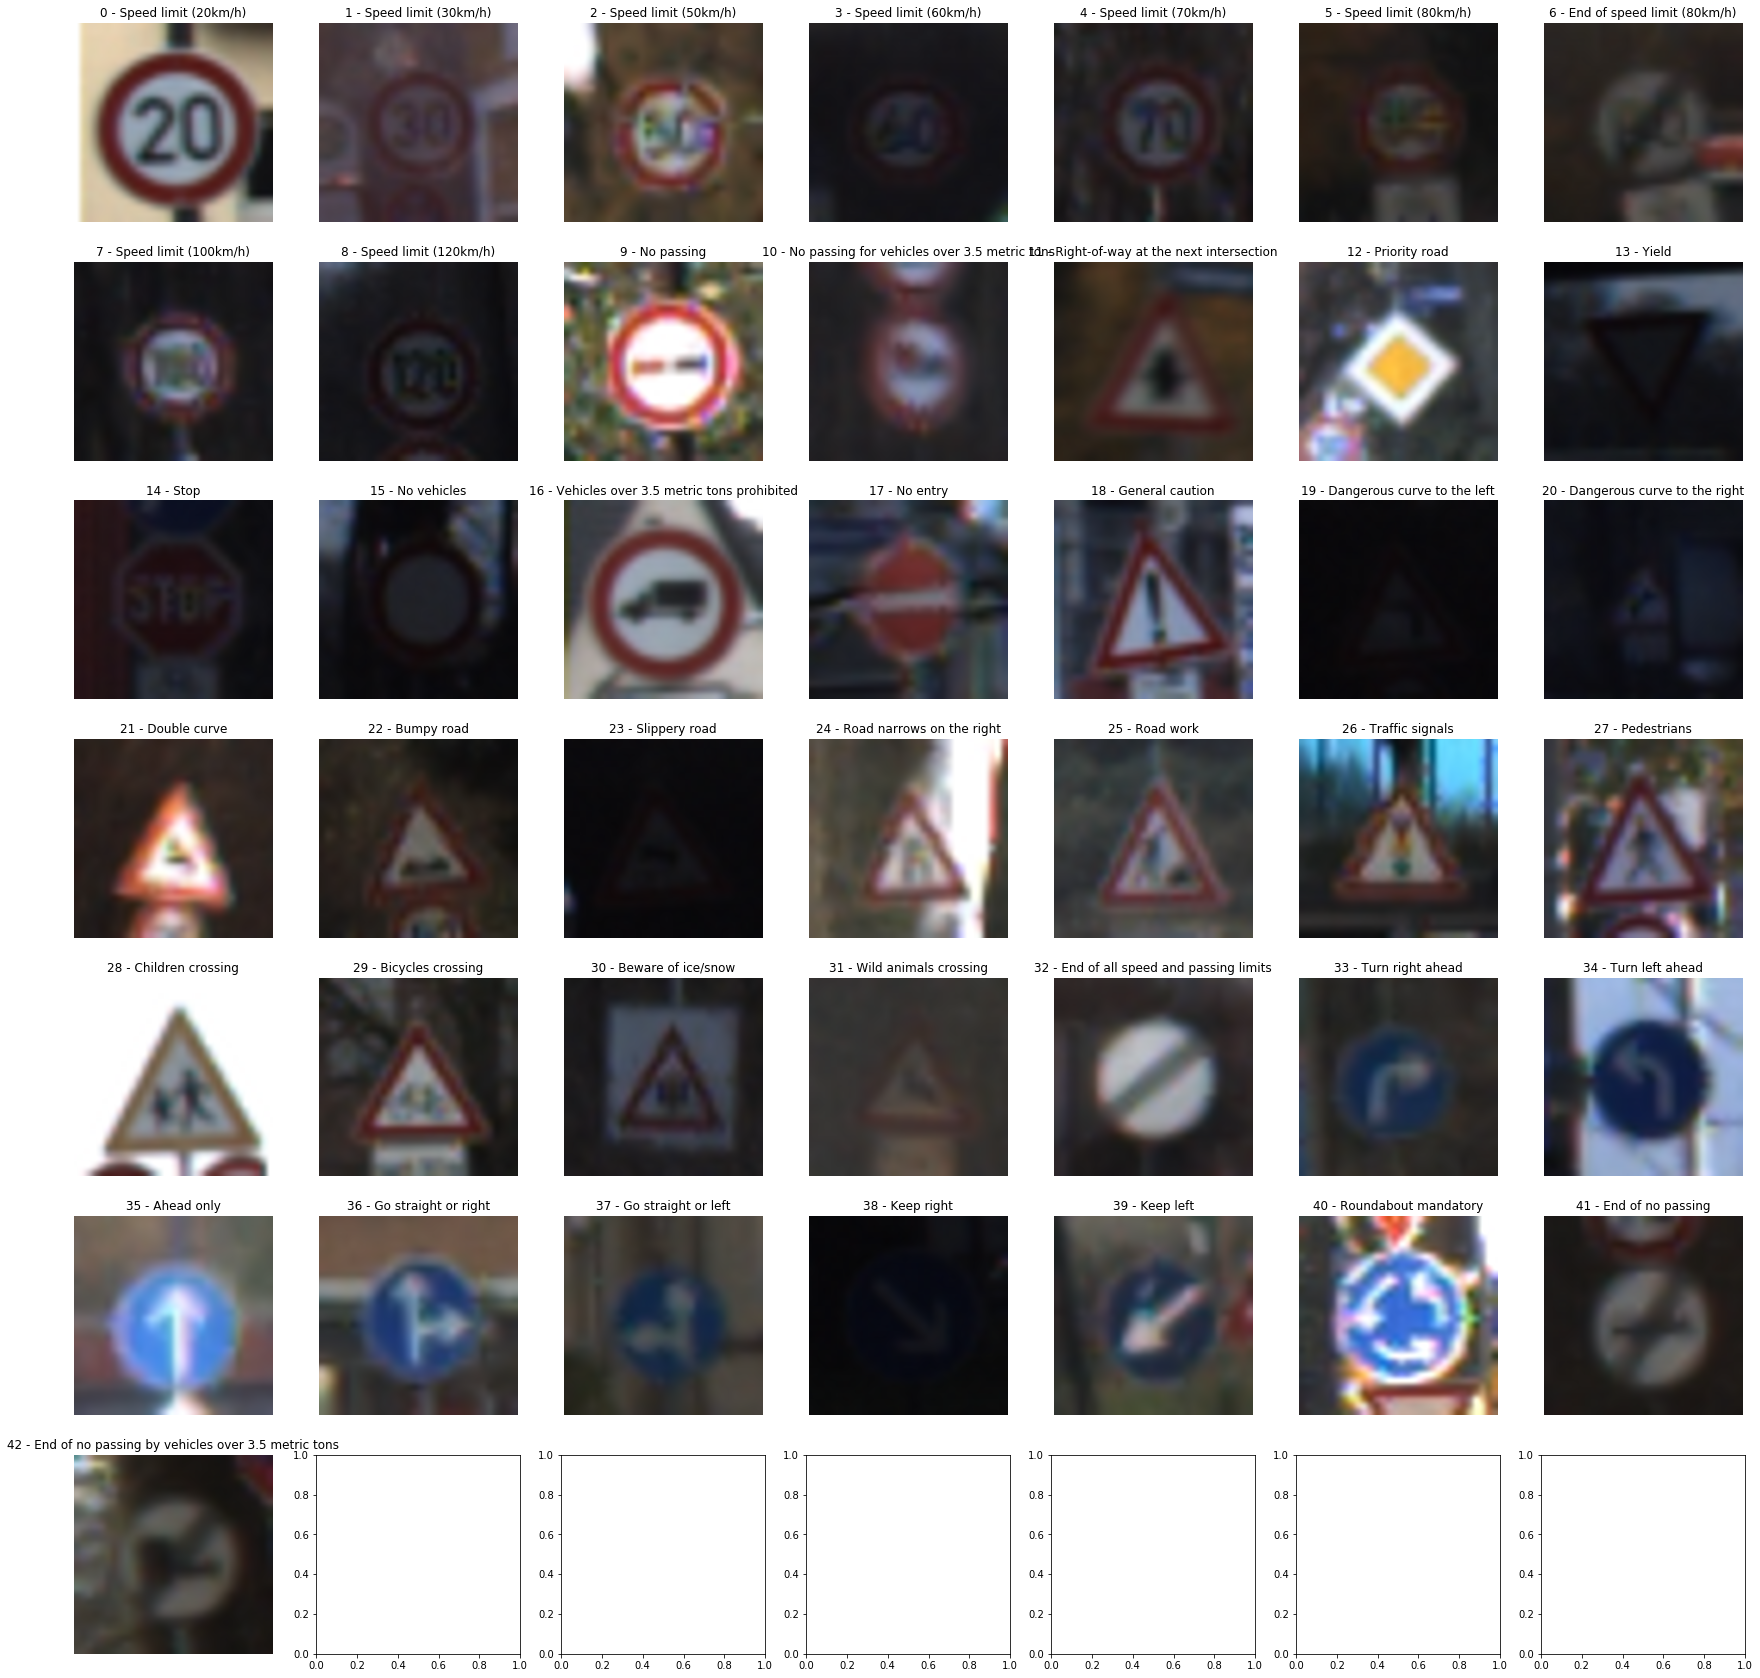

In [5]:
# Visualizations will be shown in the notebook
%matplotlib inline

def plot_signs(signs, nrows, ncols, labels=None, gray=False, figsize=(18,8)):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    axs = axs.ravel()
    for index, title in enumerate(signs):
        if gray:
            axs[index].imshow(signs[title],cmap=plt.gray(),interpolation='catrom')
        else:
            axs[index].imshow(signs[title],interpolation='catrom')
        if(labels != None):
            axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
        
        axs[index].set_axis_off()
    
sign_names = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S55')], delimiter=',')

signs = {}
labels = {}
for i in range(0,n_classes):
    index_match = np.where(y_train == i)
    labels[i] = str(i) + " - " + sign_names[y_train[index_match[0][0]]][1].decode()
    signs[i] = X_train[index_match[0][0]].squeeze()
    
plot_signs(signs, 7, 7, labels, figsize=(30,30))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 1) Convert data to grayscale

In [6]:
# convert all data to grayscale
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_valid_rgb = X_test
X_valid_gray = np.sum(X_valid/3,axis=3,keepdims=True)
X_test_rgb = X_test
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)

print('X_train RGB Shape:',X_train_rgb.shape)
print('X_train Grayscale Shape:',X_train_gray.shape)

X_train RGB Shape: (34799, 32, 32, 3)
X_train Grayscale Shape: (34799, 32, 32, 1)


### 2) Normalize data

In [7]:
# normalize data -- we subtract and divide by 127.5 because that's the halfway point on the color scale of 0-255
X_train_gray_norm = (X_train_gray - np.mean(X_train_gray))/np.std(X_train_gray)
X_valid_gray_norm = (X_valid_gray - np.mean(X_valid_gray))/np.std(X_valid_gray)
X_test_gray_norm = (X_test_gray - np.mean(X_test_gray))/np.std(X_test_gray)

# un-normalized data
print('Un-normalized Data:')
print('X_train_gray: mean = {:.4f}, std = {:.4f}'.format(np.mean(X_train_gray),np.std(X_train_gray),X_train_gray.shape))
print('X_valid_gray: mean = {:.4f}, std = {:.4f}'.format(np.mean(X_valid_gray),np.std(X_valid_gray),X_valid_gray.shape))
print('X_test_gray: mean = {:.4f}, std = {:.4f}'.format(np.mean(X_test_gray),np.std(X_test_gray),X_test_gray.shape))

# normalized data
print('Normalized Data:')
print('X_train_gray_norm: mean = {:.2}, std = {:.2}'.format(np.mean(X_train_gray_norm),np.std(X_train_gray_norm),X_train_gray.shape))
print('X_valid_gray_norm: mean = {:.2}, std = {:.2}'.format(np.mean(X_valid_gray_norm),np.std(X_valid_gray_norm),X_valid_gray.shape))
print('X_test_gray_norm: mean = {:.2}, std = {:.2}'.format(np.mean(X_test_gray_norm),np.std(X_test_gray_norm),X_test_gray.shape))

Un-normalized Data:
X_train_gray: mean = 82.6776, std = 66.0098
X_valid_gray: mean = 83.5564, std = 67.9870
X_test_gray: mean = 82.1485, std = 66.7642
Normalized Data:
X_train_gray_norm: mean = 8.2e-16, std = 1.0
X_valid_gray_norm: mean = 3.9e-17, std = 1.0
X_test_gray_norm: mean = 1.6e-15, std = 1.0


### 3) Comparing color, grayscale and normalized grayscale images

In [8]:
# visualizing grayscale images for train data
labels = {}
signs_color = {}
signs_gray = {}
signs_gray_norm = {}

max_signs = 4
index_list = []
for i in range(max_signs):
    index_list.append(random.randint(0,n_train-1))

for i, index in enumerate(index_list):
    labels[i] = sign_names[y_train[index]][1].decode()
    signs_color[i] = X_train_rgb[index].squeeze()
    signs_gray[i] = X_train_gray[index].squeeze()
    signs_gray_norm[i] = X_train_gray_norm[index].squeeze()

COLOR SIGNS


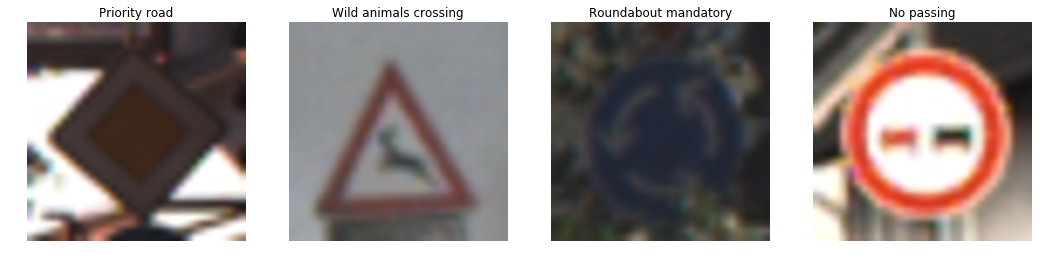

In [9]:
print('COLOR SIGNS')
plot_signs(signs_color, 1, 4, labels)

GRAY SIGNS


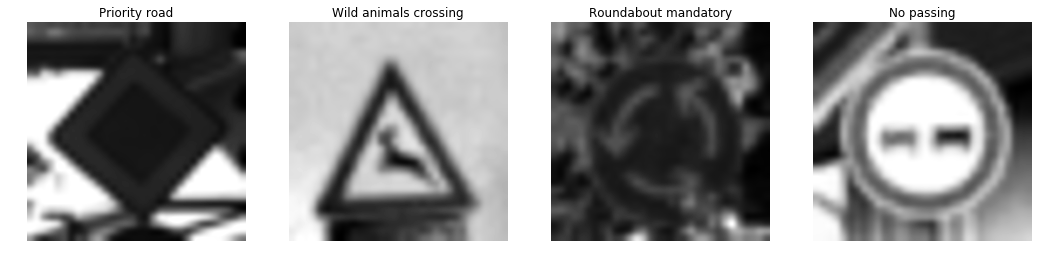

In [10]:
print('GRAY SIGNS')
plot_signs(signs_gray, 1, 4, labels, gray=True)

NORMALIZED GRAY SIGNS


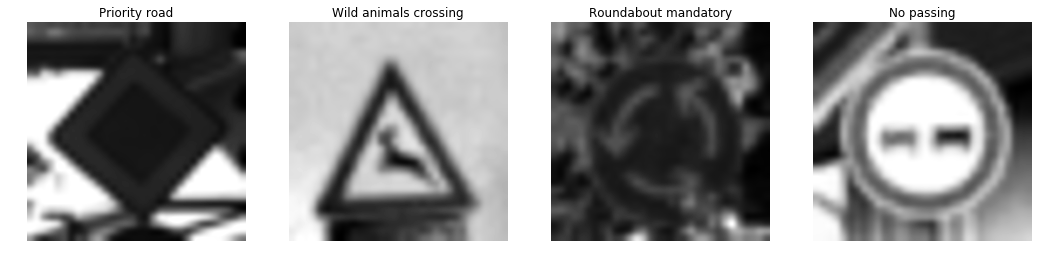

In [11]:
print('NORMALIZED GRAY SIGNS')
plot_signs(signs_gray_norm, 1, 4, labels, gray=True)

## Observation: Dataset Distribution

Based on our results, we can see that there's a disproportionate amount of examples across the various labels in the training dataset. Thus, it might be worthwhile to preprocess the less common labels via image augmentation techniques (rotation, zoom, flip, translate, color) to increase their respective dataset size, and ultimately, fit a more generalized model.

In [12]:
def describe_dataset():
    fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(20,5))
    axes = axes.ravel()
    axes[0].hist(y_train,bins=n_classes,rwidth=0.8)
    axes[0].set_title('Sign Distribution for Train Data')

    axes[1].hist(y_valid,bins=n_classes,rwidth=0.8)
    axes[1].set_title('Sign Distribution for Valid Data')

    axes[2].hist(y_test,bins=n_classes,rwidth=0.8)
    axes[2].set_title('Sign Distribution for Test Data')
    plt.show()

    print('X_train: {}, y_train: {}'.format(X_train.shape,y_train.shape))
    print('X_valid: {}, y_valid: {}'.format(X_valid.shape,y_valid.shape))
    print('X_test: {}, y_test: {}'.format(X_test.shape,y_test.shape))

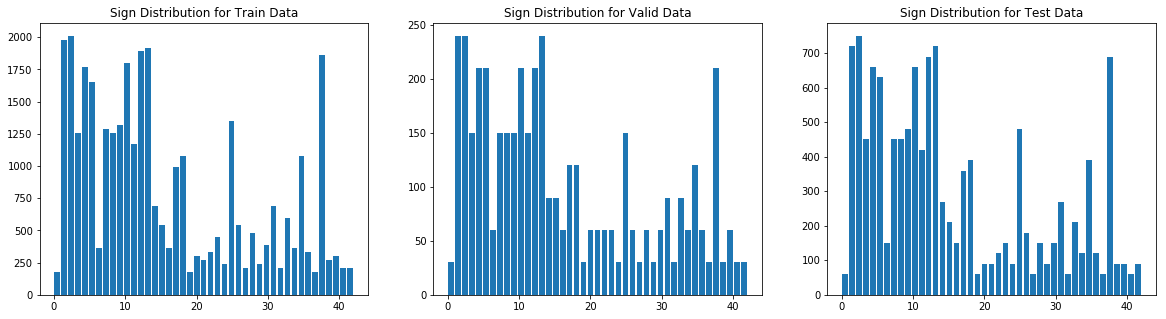

X_train: (34799, 32, 32, 3), y_train: (34799,)
X_valid: (4410, 32, 32, 3), y_valid: (4410,)
X_test: (12630, 32, 32, 3), y_test: (12630,)


In [13]:
describe_dataset()

## Pre-process Image Augmentation

This is a critical step in the pre-processing phase. We want our learning model to generalize well on our dataset of images. However, since we lack the appropriate sample size of data for certain signs, we need to apply an augmentation step to artifically generate more data.

In [14]:
test_img = X_train_gray_norm[1000]

### Translate Images

Text(0.5,1,'translated')

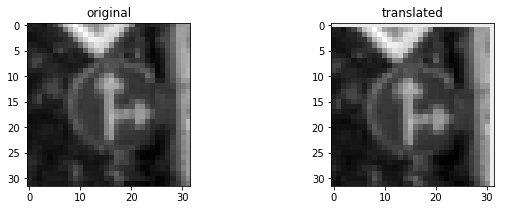

In [15]:
def img_translate(img):
    rows,cols,_ = img.shape
    
    # translate test image by px pixels in x and y directions
    pixel = 4
    dx,dy = np.random.randint(-pixel,pixel,2)

    # translate image
    M = np.float32([[1,0,dx],[0,1,dy]])
    output = cv2.warpAffine(img,M,(cols,rows))
    output = output[:,:,np.newaxis]
    
    return output

test_output = img_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

# axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

# axs[1].axis('off')
axs[1].imshow(test_output.squeeze(), cmap='gray')
axs[1].set_title('translated')

### Brigthen Images

Text(0.5,1,'brigthened')

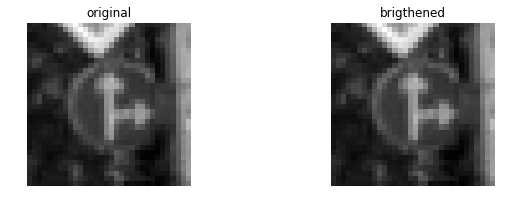

In [16]:
def img_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    output = shifted * coef - 1.0
    return output

test_output = img_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_output.squeeze(), cmap='gray')
axs[1].set_title('brigthened')

### Scale Images

Text(0.5,1,'scaled')

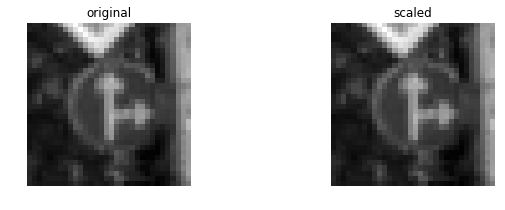

In [17]:
def img_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    limit = np.random.randint(-5,5)

    # ending locations
    end_loc = np.float32([[limit,limit],[rows-limit,limit],[limit,cols-limit],[rows-limit,cols-limit]])

    # starting locations (4 corners)
    start_loc = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    
    # scale image
    M = cv2.getPerspectiveTransform(end_loc,start_loc)
    output = cv2.warpPerspective(img,M,(rows,cols))
    output = output[:,:,np.newaxis]
    
    return output

test_output = img_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_output.squeeze(), cmap='gray')
axs[1].set_title('scaled')

### Warp Images

Text(0.5,1,'warped')

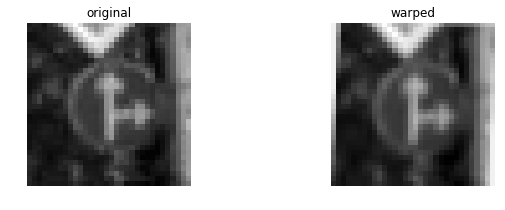

In [18]:
def img_warp(img):
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(4) - 0.5
    rndx *= cols * 0.08   # this coefficient determines the degree of warping
    rndy = np.random.rand(4) - 0.5
    rndy *= rows * 0.08

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)
    output = cv2.warpAffine(img,M,(cols,rows))
    output = output[:,:,np.newaxis]
    
    return output

test_output = img_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_output.squeeze(), cmap='gray')
axs[1].set_title('warped')

### Populate Training Dataset by Generating Augmented Images

In [ ]:
print('X, y shapes:', X_train_gray_norm.shape, y_train.shape)

for class_n in range(n_classes):
    print(class_n, ':', end='')
    index_match = np.where(y_train == class_n)
    n_match = len(index_match[0])
    if n_match < 1200:
        for i in range(1,1200 - n_match):
            image = X_train_gray_norm[index_match[0][i % n_match]]
            image_modified = img_scaling(img_warp(img_brightness(img_translate(image))))
            X_train_gray_norm = np.concatenate((X_train_gray_norm, [image_modified]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 100 == 0:
                print('+', end='')
            elif i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train_gray_norm.shape, y_train.shape)

### Save augmented image data

In [ ]:
# set valid/test data as normalized grayscale data; this is essential for the shape of the image
X_train = X_train_gray_norm
X_valid = X_valid_gray_norm
X_test = X_test_gray_norm

# save the augmented data as this step takes quite some time to complete
train_augmented = {'features': X_train,
             'labels': y_train}
valid_augmented = {'features': X_valid,
             'labels': y_valid}
test_augmented = {'features': X_test,
             'labels': y_test}
pickle.dump(train_augmented, open( "./augmented_data/train_augmented.p", "wb" ) )
pickle.dump(valid_augmented, open( "./augmented_data/valid_augmented.p", "wb" ) )
pickle.dump(test_augmented, open( "./augmented_data/test_augmented.p", "wb" ) )

### If available, load previously augmented data

In [20]:
augmented_data_available = True # manually set to True or False, depending on the availability of previously augmented images

# if augmented data was previously generated, we can load the data here
if augmented_data_available:
    training_file_augmented = 'augmented-data/train_augmented.p'
    validation_file_augmented = 'augmented-data/valid_augmented.p'
    testing_file_augmented = 'augmented-data/test_augmented.p'

    with open(training_file_augmented, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file_augmented, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file_augmented, mode='rb') as f:
        test = pickle.load(f)
        
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

## Dataset Distribution after Data Augmentation

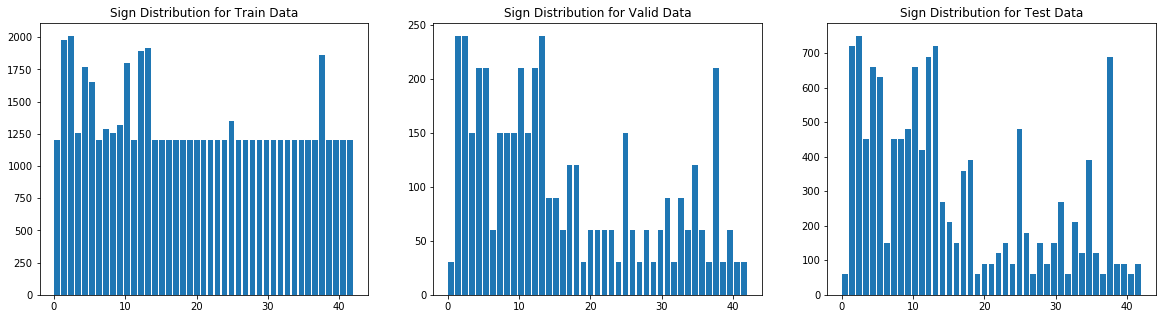

X_train: (57330, 32, 32, 1), y_train: (57330,)
X_valid: (4410, 32, 32, 1), y_valid: (4410,)
X_test: (12630, 32, 32, 1), y_test: (12630,)


In [21]:
describe_dataset()

### Model Architecture

In [22]:
def LeNet_modified(x):
    # function variables
    mu = 0
    sigma = 0.1
    
    # formula to note: output_layer = (input_layer - filter_layer + 2 * padding) / stride + 1
    
    # layer 1 - convolution // input = 32x32x1, output = 28x28x6
    W1 = tf.Variable(tf.truncated_normal(shape=[5,5,1,6],mean=mu,stddev=sigma))
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.conv2d(x,W1,strides=[1,1,1,1],padding='VALID') + b1
    print('Layer 1 shape:',x.shape)
    
    # layer 1 - activation
    x = tf.nn.relu(x)
    print('Layer 1 shape after activation:',x.shape)
    
    # layer 1 - pooling // input = 28x28x6, output = 14x14x6
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    print('Layer 1 shape after max pooling:',x.shape)
    layer1_x_flat = flatten(x) # flat output
    print('Layer 1 flat:',layer1_x_flat.shape)
    
    # layer 2 - convolution // input = 14x14x6, output = 10x10x16
    W2 = tf.Variable(tf.truncated_normal(shape=[5,5,6,16],mean=mu,stddev=sigma))
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.conv2d(x,W2,strides=[1,1,1,1],padding='VALID') + b2
    print('Layer 2 shape:',x.shape)
    
    # layer 2 - activation
    x = tf.nn.relu(x)
    print('Layer 2 shape after activation:',x.shape)
    
    # layer 2 - pooling // input = 10x10x16, output = 5x5x16
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    print('Layer 2 shape after pooling:',x.shape)
    layer2_x_flat = flatten(x) # flat output = 400
    print('Layer 2 flat:',layer2_x_flat.shape)
    
    # layer 3 - convolution // input = 5x5x16, output = 1x1x400
    W3 = tf.Variable(tf.truncated_normal(shape=(5,5,16,400),mean=mu,stddev=sigma))   
    b3 = tf.Variable(tf.zeros(400))
    x = tf.nn.conv2d(x,W3,strides=[1,1,1,1],padding='VALID') + b3
    
    # layer 3 - activation
    x = tf.nn.relu(x)
    layer3_x_flat = flatten(x) # flat output = 400
    print('Layer 3 flat:',layer3_x_flat.shape)
    
    # combine layer 2 and 3 flats
    x = tf.concat([layer3_x_flat,layer2_x_flat],1)
    print('Combined flat layers:',x.shape)
    
    # dropout
    x = tf.nn.dropout(x,keep_prob)
    
    # layer 4 - fully connected // input = 800, output = 43
    W4 = tf.Variable(tf.truncated_normal(shape=[800,43],mean=mu,stddev=sigma))
    b4 = tf.Variable(tf.zeros(43))
    x = tf.matmul(x,W4) + b4
    print('Layer 4 fully connected:',x.shape)
    
    logits = x
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:
# use this function to evaluate our ML model prediction accuracy
def evaluate(X_data,y_data):
    assert(len(X_data)==len(y_data))
    num_examples = len(y_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0,num_examples,BATCH_SIZE):
        batch_x,batch_y = X_data[offset:offset+BATCH_SIZE],y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
# training model parameters
EPOCHS = 100
BATCH_SIZE = 110
LR=0.00075
DROPOUT = 0.5

# tf placeholders
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32)

# training pipeline
logits = LeNet_modified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LR)
training_operation = optimizer.minimize(loss_operation)

# model evaluation
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Layer 1 shape: (?, 28, 28, 6)
Layer 1 shape after activation: (?, 28, 28, 6)
Layer 1 shape after max pooling: (?, 14, 14, 6)
Layer 1 flat: (?, 1176)
Layer 2 shape: (?, 10, 10, 16)
Layer 2 shape after activation: (?, 10, 10, 16)
Layer 2 shape after pooling: (?, 5, 5, 16)
Layer 2 flat: (?, 400)
Layer 3 flat: (?, 400)
Combined flat layers: (?, 800)
Layer 4 fully connected: (?, 43)


In [25]:
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(57330, 32, 32, 1) (57330,)
(4410, 32, 32, 1) (4410,)
(12630, 32, 32, 1) (12630,)


In [26]:
# keep track of progress over time
validation_history = []

saver = tf.train.Saver()

# model training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0,num_examples,BATCH_SIZE):
            end = offset+BATCH_SIZE
            batch_x,batch_y = X_train[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y,keep_prob:0.5})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_history.append(validation_accuracy)
        print('EPOCH {} ...'.format(i+1))
        print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))
    saver.save(sess,'./ysc_lenet_traffic_classifier')
    print('Model saved.')

Training...
EPOCH 1 ...
Validation Accuracy = 0.836
EPOCH 2 ...
Validation Accuracy = 0.906
EPOCH 3 ...
Validation Accuracy = 0.925
EPOCH 4 ...
Validation Accuracy = 0.929
EPOCH 5 ...
Validation Accuracy = 0.944
EPOCH 6 ...
Validation Accuracy = 0.949
EPOCH 7 ...
Validation Accuracy = 0.954
EPOCH 8 ...
Validation Accuracy = 0.955
EPOCH 9 ...
Validation Accuracy = 0.960
EPOCH 10 ...
Validation Accuracy = 0.959
EPOCH 11 ...
Validation Accuracy = 0.964
EPOCH 12 ...
Validation Accuracy = 0.963
EPOCH 13 ...
Validation Accuracy = 0.960
EPOCH 14 ...
Validation Accuracy = 0.963
EPOCH 15 ...
Validation Accuracy = 0.963
EPOCH 16 ...
Validation Accuracy = 0.965
EPOCH 17 ...
Validation Accuracy = 0.966
EPOCH 18 ...
Validation Accuracy = 0.962
EPOCH 19 ...
Validation Accuracy = 0.962
EPOCH 20 ...
Validation Accuracy = 0.966
EPOCH 21 ...
Validation Accuracy = 0.966
EPOCH 22 ...
Validation Accuracy = 0.970
EPOCH 23 ...
Validation Accuracy = 0.965
EPOCH 24 ...
Validation Accuracy = 0.967
EPOCH 25 ...


### Model Performance on Validation/Test Data

Model Test Accuracy:


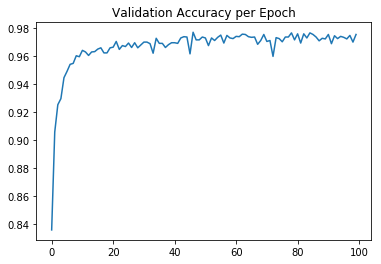

In [27]:
plt.plot(validation_history)
plt.title('Validation Accuracy per Epoch')
plt.Text=False

print('Model Test Accuracy:'.format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

google images shape: (8, 32, 32, 3)
google images gray shape: (8, 32, 32, 1)
google images gray norm shape: (8, 32, 32, 1)


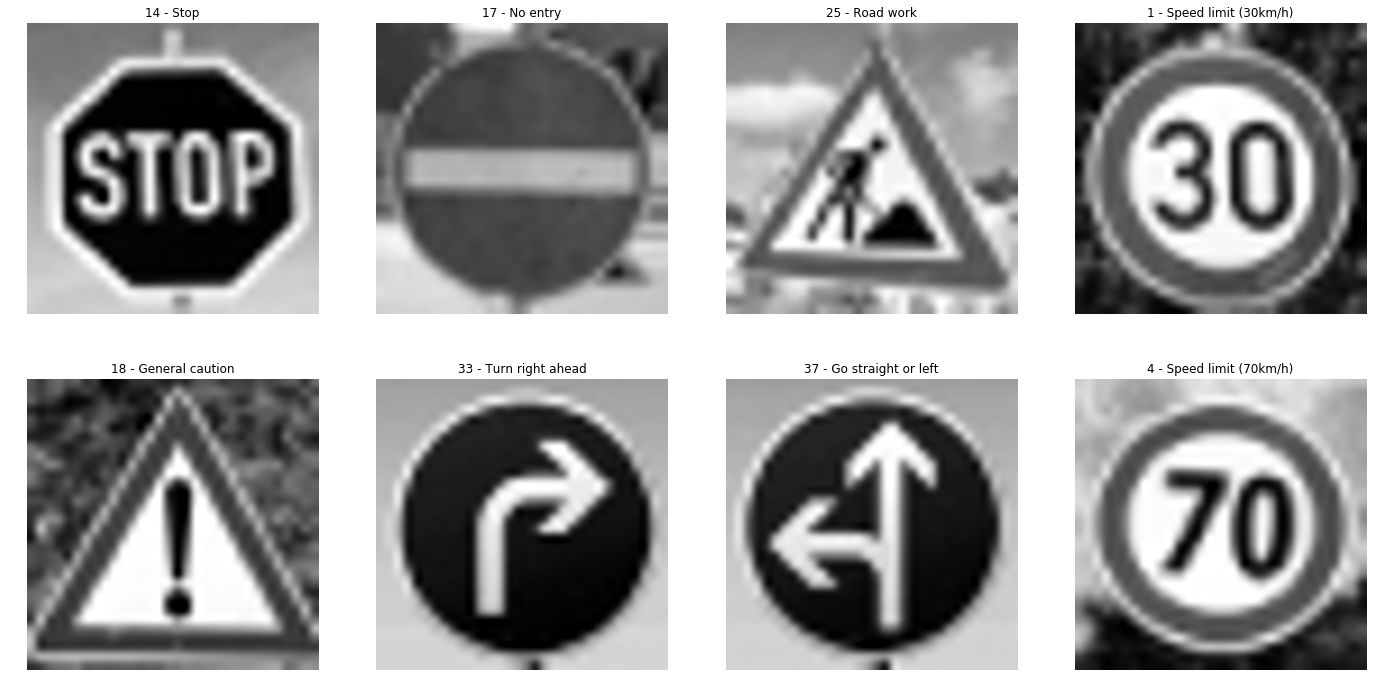

In [104]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

images = glob.glob('./googled-traffic-signs/*.jpg')

google_images = []
for i, image in enumerate(images):
    google_images.append(cv2.imread(image))

google_images = np.asarray(google_images)
print('google images shape:',google_images.shape)

google_images_gray = np.sum(google_images/3,axis=3,keepdims=True)
print('google images gray shape:',google_images_gray.shape)

google_images_gray_norm = (google_images_gray - np.mean(google_images_gray))/np.std(google_images_gray)
print('google images gray norm shape:',google_images_gray_norm.shape)

signs = {}
labels = {}
google_image_labels = [14,17,25,1,18,33,37,4]
for i,label in enumerate(google_image_labels):
    signs[i] = google_images_gray_norm[i].squeeze()
    labels[i] = str(label) + " - " + sign_names[label][1].decode()

plot_signs(signs, 2, 4, labels, gray=True, figsize=(24,12))

### Analyze Performance

In [84]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./ysc_lenet_traffic_classifier.meta')
    saver.restore(sess,'./ysc_lenet_traffic_classifier')
    model_accuracy = evaluate(google_images_gray_norm,google_image_labels)
    print('Test Accuracy = {}'.format(model_accuracy))

INFO:tensorflow:Restoring parameters from ./ysc_lenet_traffic_classifier
Test Accuracy = 1.0


### Output Top 3 Softmax Probabilities For Traffic Signs Found on Google

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [85]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits,k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./ysc_lenet_traffic_classifier.meta')
    saver.restore(sess,'./ysc_lenet_traffic_classifier')
    model_softmax_logits = sess.run(softmax_logits, feed_dict={x: google_images_gray_norm, keep_prob: 1.0})
    model_top_k = sess.run(top_k, feed_dict={x: google_images_gray_norm, keep_prob: 1.0})
    model_accuracy = evaluate(google_images_gray_norm,google_image_labels)
    print('Test Accuracy = {}'.format(model_accuracy))

INFO:tensorflow:Restoring parameters from ./ysc_lenet_traffic_classifier
Test Accuracy = 1.0


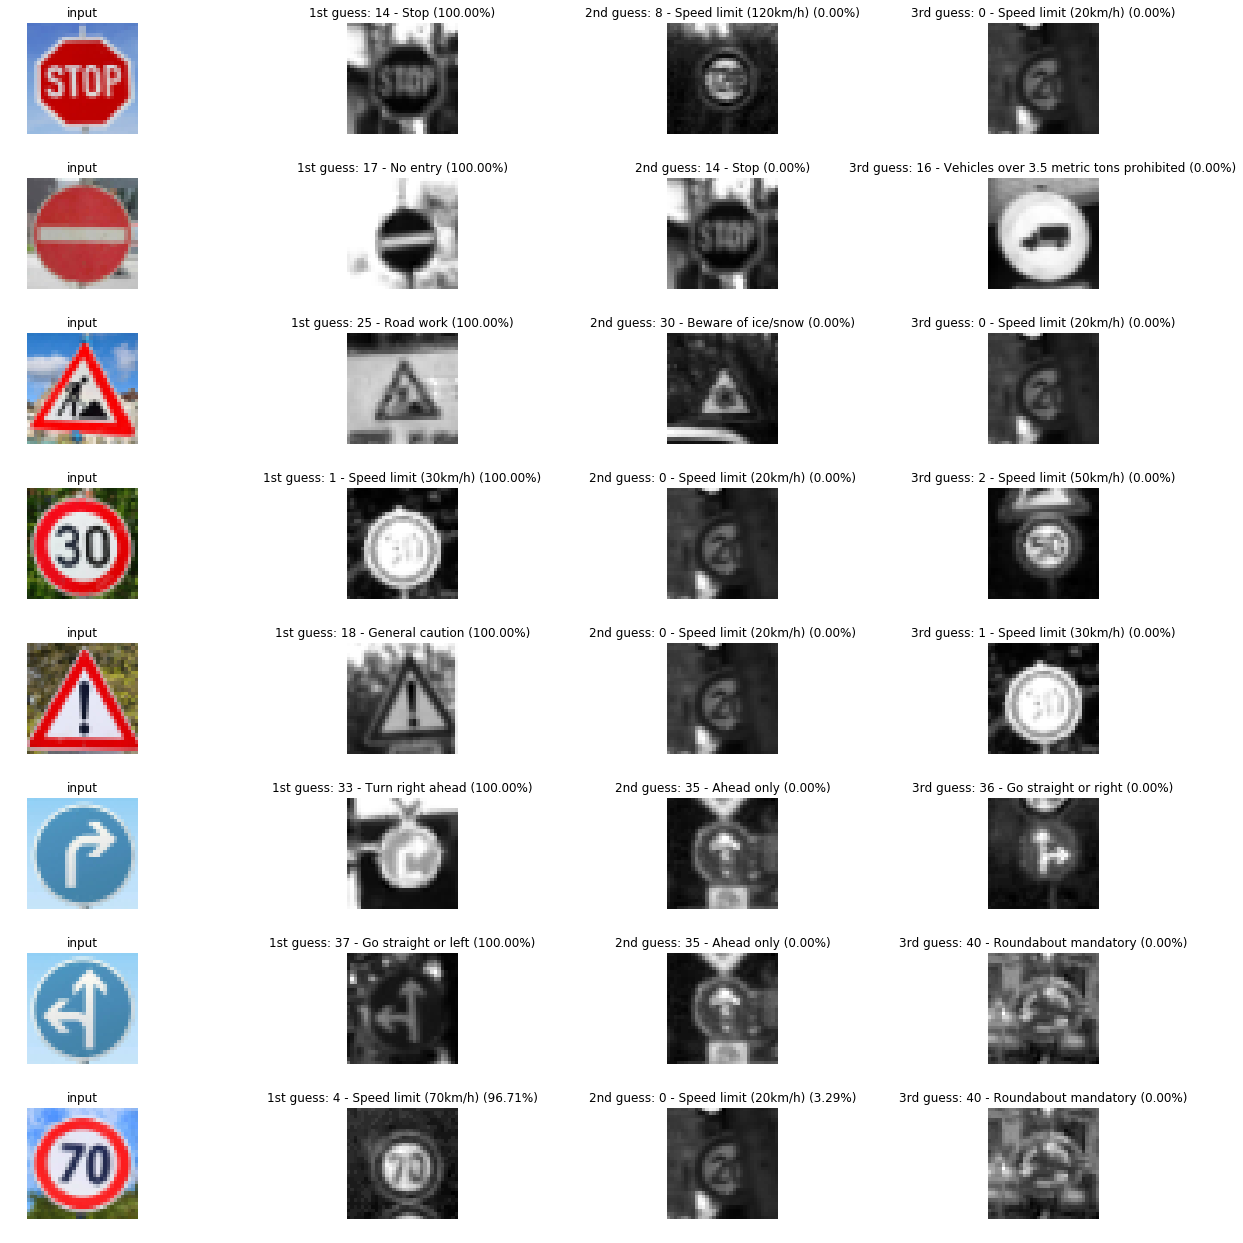

In [100]:
fig, axs = plt.subplots(len(google_images_gray_norm),4, figsize=(22, 22))
fig.subplots_adjust(hspace = .4, wspace=.2)
axs = axs.ravel()

for i, image in enumerate(google_images_gray_norm):
    axs[4*i].axis('off')
    axs[4*i].imshow(cv2.cvtColor(google_images[i], cv2.COLOR_BGR2RGB))
    axs[4*i].set_title('input')
    guess1 = model_top_k[1][i][0]
    index1 = np.argwhere(y_valid == guess1)[0]
    axs[4*i+1].axis('off')
    axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
    axs[4*i+1].set_title('1st guess: {} - {} ({:.2f}%)'.format(guess1, sign_names[guess1][1].decode(), 100*model_top_k[0][i][0]))
    guess2 = model_top_k[1][i][1]
    index2 = np.argwhere(y_valid == guess2)[0]
    axs[4*i+2].axis('off')
    axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
    axs[4*i+2].set_title('2nd guess: {} - {} ({:.2f}%)'.format(guess2,  sign_names[guess2][1].decode(), 100*model_top_k[0][i][1]))
    guess3 = model_top_k[1][i][2]
    index3 = np.argwhere(y_valid == guess3)[0]
    axs[4*i+3].axis('off')
    axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
    axs[4*i+3].set_title('3rd guess: {} - {} ({:.2f}%)'.format(guess3,  sign_names[guess3][1].decode(), 100*model_top_k[0][i][2]))

### Trained Classifier Results on Random German Traffic Signs found on Google

The trained classifier model does a good job of accurately predicting the various traffic signs that was found on the web with an impressive accuracy of 100%. Based on our softmax probabilities, we can also see the degree of confidence in which it predicted each of these signs. The only time our trained model wasn't 100% certain about was for the 70km/h speed limit sign. The model was still 96.71% confident that it was a 70km/h speed limit, with an unlikely 3.29% chance that it's a 20km/h speed limit sign.

# Traffic Sign Classifier - Project Writeup

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. 

My preprocessing approach was as follows:
1) Convert all RGB images to grayscale. Reducing the channel dimensions from a 3 color channel (RGB) to a single grayscale channel reduces the number of data points in each given image from 3072 (32x32x3) to 1024 (32x32x1). This 67% reduction in image size also effectively reduces the computational cost of training a ML model to our traffic sign dataset.

2) Normalize converted grayscale images so that their mean is 0 and standard deviation is 1. This is achieved by subtracting each pixel instance in an image by its mean, then dividing by its standard deviation. Normalization is essential because this ensures that each image is standardized and proportional, which allows the weights in a DNN to converge smoothly. 

3) Due to the lack of available traffic sign data in some of the 43 classes, I developed an image augmentation pipeline that uses the available image data and cv2 to generate additional images. This is a critical step in our pre-processing phase. In addition to providing a larger statistical significance when training the model, additional augmented images allows our learning model to generalize much better. A model that can generalize well is a desirable characteristic because it results in a more robust classifier that can predict a larger variety of traffic signs regardless of the brightness, angle, and contrast of a traffic sign image.

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.

My learning model was primarily based on the LeNet architecture, with a few modifications:

1. Convolution with 5x5 Filter -- in: 32x32x1, out: 28x28x6
2. ReLU Activation -- in/out: 28x28x6
3. Maxpooling with 2x2 Stride -- in: 28x28x6, out: 14x14x6
4. Convolution with 5x5 Filter -- in: 14x14x6, out: 10x10x16
5. ReLU Activation -- in/out: 10x10x16
6. Maxpooling with 2x2 Stride -- in: 10x10x16, out: 5x5x16
7. Convolution with 5x5 Filter -- in: 5x5x16, out: 1x1x400
8. ReLU Activation -- in/out: 1x1x400
9. Flatten and concatenate layers 6 (5x5x16=400) and 8 (1x1x400=400) -- out: 800
10. Apply Dropout
11. Fully Connected Layer -- in: 800, out: 43


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

Training the model primarily consisted of a combination of applying the intuition gained from doing the udacity training exercises, and trial and error. The hyperparameters that seemed to work the best for me were as follows:

* EPOCHS: 100
* BATCH SIZE: 110
* LEARNING RATE: 0.00075
* DROPOUT: 0.5
* MU: 0
* SIGMA: 0.1

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

**What was the first architecture that was tried and why was it chosen?**

The LeNet architecture was a good starting point because it already had the right properties (combination of convolution and max pooling layers) for an effective model classifier for 32x32x3 images.

**What were some problems with the initial architecture?**

This model worked well except that the accuracy seemed to plateau after so many epochs.

**How was the architecture adjusted and why was it adjusted?**

The original LeNet architecture has two convolutional layers, and three fully connected layers, so that's what I initially started with. Then through the use of an iterative approach, I deteremined which combination of convolution/fully-connected layers resulted in better predictions in the classfier model. These were the models I tested:

* Original LeNet: 2 Convolutional Layers w/ Max Pooling and 3 Fully Connected Layers
* Modified LeNet-1: 1 Convolutional Layers w/ Max Pooling and 1 Fully Connected Layers
* Modified LeNet-2: 1 Convolutional Layers w/ Max Pooling and 2 Fully Connected Layers
* Modified LeNet-3: 2 Convolutional Layers w/ Max Pooling and 1 Fully Connected Layers
* Modified LeNet-4: 2 Convolutional Layers w/ Max Pooling and 2 Fully Connected Layers
* Modified LeNet-5: 3 Convolutional Layers w/ Max Pooling and 1 Fully Connected Layers
* Modified LeNet-6: 3 Convolutional Layers w/ Max Pooling and 2 Fully Connected Layers

In an effor to reduce the compuational cost on my GPU, my goal was to determine the most optimal classifier architecture that used the least number of layers while still maintaining prediction accuracy. For the most part, I found that 3 convolutional layers paired with a single fully connected layer appeared to work quite well for the purpose of classifying traffic signs.

**Which parameters were tuned? How were they adjusted and why?**

All parameters were fine-tuned through a process I like to refer to as "intuitive trial and error."

**My final model results were:**
* Accuracy of validation set = 97.5%
* Accuracy of test set = 95.7%
* Accuracy of random german traffic signs found via google images = 100%